# Example Inference

In [1]:
import os
import sys
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from tqdm       import tqdm
from glob       import glob
from mmseg.apis import init_segmentor
from mmseg.apis import inference_segmentor

sys.path.append("../SegVit/decode_heads")
sys.path.append("../SegVit/losses")

import atm_head, tpn_atm_head, atm_loss


/opt/conda/lib/python3.11/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [2]:
config_file     = '../configs/token_reducing_config_gpu.py'
checkpoint_file = '../model/checkpoint/COCOstuff_49.9.pth'

model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

VIDEO_GAIMERSHEIM = sorted(glob('../dataset/camera_lidar/20180810_150607/camera/cam_front_center/*.png'))

Initializing ATM head
load checkpoint from local path: ../model/checkpoint/COCOstuff_49.9.pth


/tmp/tmpgopk_krc/tmpm8ullz5z.py:690: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


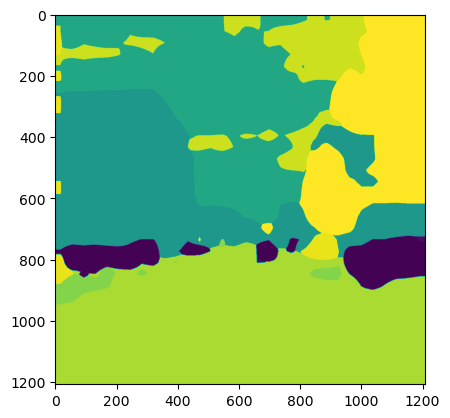

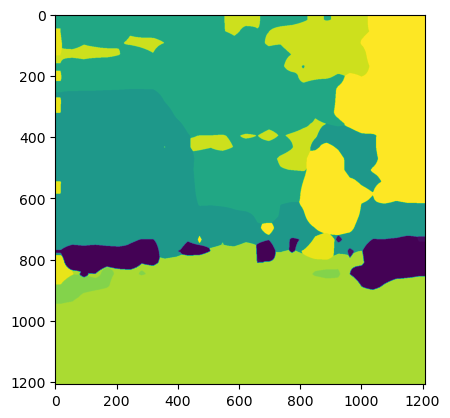

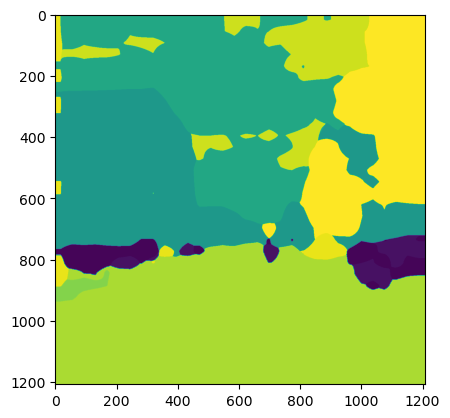

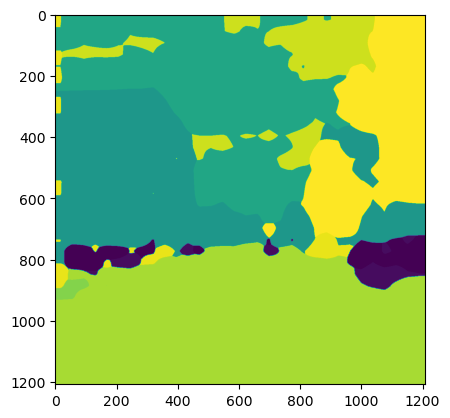

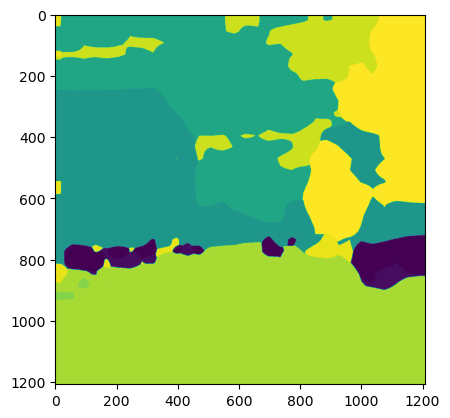

In [3]:
for i, img_path in enumerate(VIDEO_GAIMERSHEIM[:5]):
    result = inference_segmentor(model, img_path)

    plt.imshow(result[0])
    plt.show()